In [0]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt #visualizacion de datos

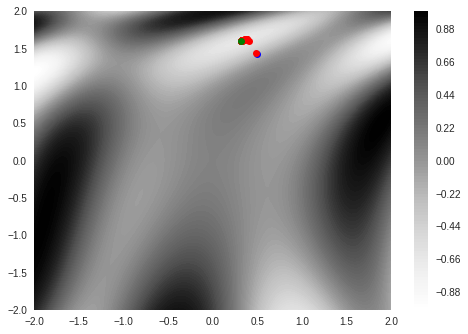

In [34]:
#FUNCION QUE SE QUIERE MINIMIZAR

#func = lambda th: np.sin(1/2 * x**2 - 1/4 *y**2 + 3) * np.cos(2*x + 1 - np.e**y) # en funcion de x e y
func = lambda th: np.sin(1/2 * th[0]**2 - 1/4 *th[1]**2 + 3) * np.cos(2*th[0] + 1 - np.e**th[1]) # ahora en funcion de th, th: vector de parametros

res = 100 

_X = np.linspace(-2, 2, res) # se genera un vector con 100 valores que van desde -2 a 2
_Y = np.linspace(-2, 2, res)

_Z = np.zeros((res,res))

for ix, x in enumerate(_X): # por cada dato en _X va a entregar su indice y su valor
  for iy, y in enumerate(_Y):
    _Z[iy, ix] = func([x,y])
    

# plt.contour? para ver como se usa una funcion

plt.contourf(_X, _Y, _Z, 100)
plt.colorbar() # se añade la barra de color

theta = np.random.rand(2) * 4 - 2

_T = np.copy(theta)
h = 0.001 # un pequeño incremento
lr = 0.01 # ratio de aprendizaje

plt.plot(theta[0], theta[1], "o", c="blue")

grad = np.zeros(2) # resultado del vector gradiente

for _ in range(10000): # repetir 1000 veces
  for it, th in enumerate(theta):
    _T = np.copy(theta)
    _T[it] = _T[it] + h
    deriv = (func(_T) - func(theta)) / h #derivada parcial del primer vector, la pendiente 
    grad[it] = deriv

  theta = theta - lr * grad
  
  if(_ % 10 == 0):
    plt.plot(theta[0], theta[1], "o", c="red")
  
plt.plot(theta[0], theta[1], "o", c="green") # esto seria el minimo logrado usando el metodo del gradient descent
  
plt.show()
